In [1]:
import torch
import pyro
import numpy as np
from hysteresis.meshing import exponential_mesh
from hysteresis.linearized import LinearizedHysteresis
from hysteresis.training import train_bayes, train_torch, map_bayes
from hysteresis.visualization import plot_hysteresis_density
import matplotlib.pyplot as plt

In [2]:
fname = '../../facet_ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:, 1] = data[:, 1]
data[:, 3] = data[:, 3] * np.where(data[:,7] < 0, -1, 1)

# get real h, m
h = torch.tensor(data[:,1]).double()
m = torch.tensor(data[:,3]).double()

calculated 25 states


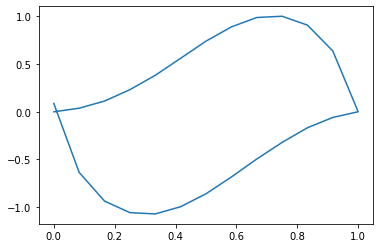

In [3]:
# Do estimate w/o correlations
H = LinearizedHysteresis(h, m, mesh_scale=0.5)

hl = H.transformer.transform_h(h)
ml = H.transformer.transform_m(m, h)

plt.plot(hl, ml)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


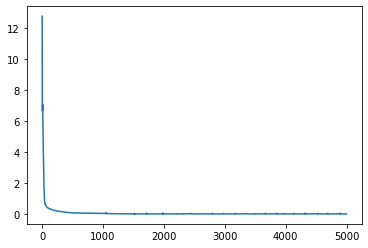

In [4]:
# train model
loss = train_torch(H, ml, 5000)
plt.plot(loss)

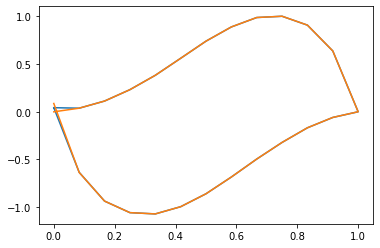

In [5]:
mp = H.predict_magnetization()
plt.plot(hl, mp.detach())
plt.plot(hl, ml)

calculated 99 states


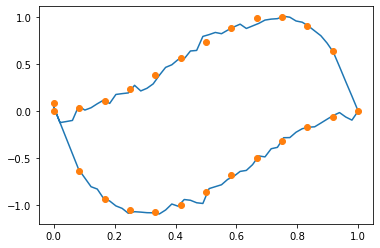

In [6]:
t = torch.linspace(0, 1, 50)
h_test = torch.cat((t, t.flipud()))
mp_test = H.predict_magnetization(H.transformer.untransform_h(h_test))
plt.plot(h_test, mp_test.detach())
plt.plot(hl, ml,'o')


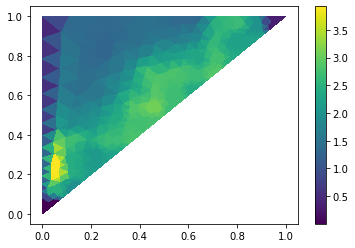

In [10]:
from hysteresis.visualization import plot_hysteresis_density
dens = H.hysterion_density.detach()
fig, ax = plot_hysteresis_density(H,dens)

In [8]:
print(H.l_scale)
print(H.l_slope)
print(H.l_offset)


Parameter containing:
tensor([1.8966], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([8.1134], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([4.0777], dtype=torch.float64, requires_grad=True)
